Importing the dataset

In [2]:
import pandas as pd
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head(3)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278


Identifying variables:
* **id** : station identification code
* **element** : type of temperature value on that day
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

I then created a new_df variable to manipulate rather than directly editing the original dataset in case further original information is needed.

In [4]:
new_df = df


In the next cell, there is some basic cleaning approaches to prepare the data for visualisation purposes. Also, I seperated the max and min types into two different dataframes, which would make the visulasation setting smoother

In [23]:
new_df["Data_Value"] = (df["Data_Value"] / 10)
new_df["Date"] = pd.to_datetime(df["Date"])

new_df = new_df[~((new_df["Date"].dt.month == 2) & (new_df['Date'].dt.day == 29))]

new_df["MD"] = new_df["Date"].dt.strftime("%m-%d")

maxdf = new_df[new_df["Element"] == "TMAX"]
mindf = new_df[new_df["Element"] == "TMIN"]
print(len(maxdf), len(mindf))
new_df.head()

83020 81982


,ID,Date,Element,Data_Value,MD
0,USW00094889,2014-11-12,TMAX,0.22,11-12
1,USC00208972,2009-04-29,TMIN,0.56,04-29
2,USC00200032,2008-05-26,TMAX,2.78,05-26
3,USC00205563,2005-11-11,TMAX,1.39,11-11
4,USC00200230,2014-02-27,TMAX,-1.06,02-27


Next is creating groupes by each day of the year, taking the maximum and minimum value of temperature across all stations in that area to better identify the difference in 2015 later on.

In [24]:
max_grouped = maxdf.groupby("Date")[["Date", "MD", "Data_Value"]].max()
min_grouped = mindf.groupby("Date")[["Date", "MD", "Data_Value"]].min()

print(len(max_grouped), len(min_grouped))
max_grouped.head(3)

4015 4015


,Date,MD,Data_Value
Date,,,
2005-01-01,2005-01-01,01-01,1.56
2005-01-02,2005-01-02,01-02,1.39
2005-01-03,2005-01-03,01-03,1.33


The following step is finally seperating the 2015 data from the rest in a different dataset.

In [25]:
# taking every instance that is in the year 2015
mxdata_15 = max_grouped[max_grouped.index >= "2015"]
mndata_15 = min_grouped[min_grouped.index >= "2015"]

# saving the rest in a seperate dataset which will be visualised individually
mxdata_14 = max_grouped[max_grouped.index < "2015"]
mndata_14 = min_grouped[min_grouped.index < "2015"]

# calculate the minimum and maximum values for the day of the year for 2005 through 2014
# group by month and day with pandas datetime functionality
new_max_14 = mxdata_14.groupby("MD")[["MD", "Data_Value"]].max()
new_min_14 = mndata_14.groupby("MD")[["MD", "Data_Value"]].min()

# check if it was around 365 then the function had performed as expected hopefully
print(len(new_max_14), len(new_min_14))

#calculate the minimum and maximum values for the years 2015
new_max_15 = mxdata_15.groupby("MD")[["MD", "Data_Value"]].max()
new_min_15 = mndata_15.groupby("MD")[["MD", "Data_Value"]].min()


365 365


Now that the data is cleaned and everything is sepereate, I will start plotting everything in one chart using matplotlib.pyplot library.

C:\Users\aqeel\AppData\Local\Temp\ipykernel_2652\3974769539.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_max["Date"] = pd.to_datetime("2014-" + new_min_14["MD"], format="%Y-%m-%d")
C:\Users\aqeel\AppData\Local\Temp\ipykernel_2652\3974769539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_min["Date"] = pd.to_datetime("2014-" + new_min_14["MD"], format="%Y-%m-%d")


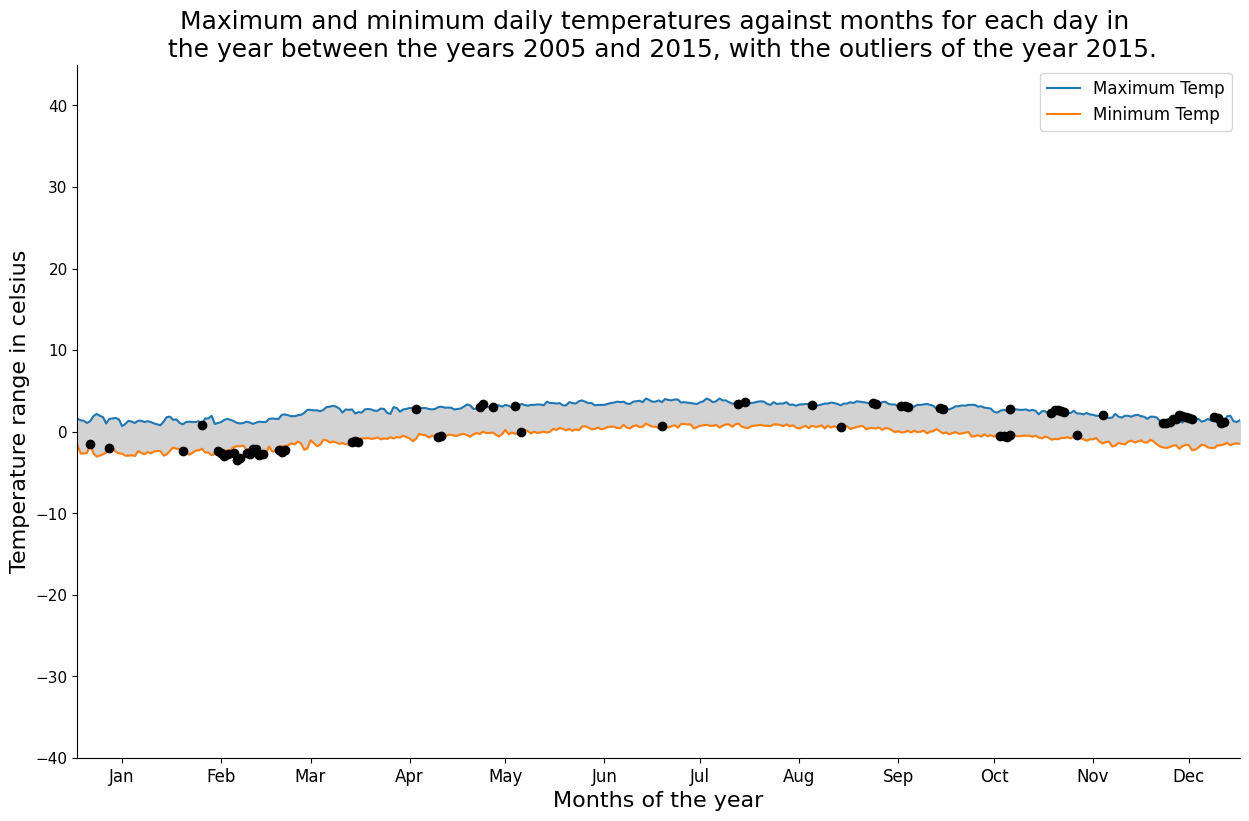

In [30]:
import matplotlib.pyplot as plt

# creating a date column for the purpose of setting Axes titiles
new_max_14["Date"] = pd.to_datetime("2014-" + new_max_14["MD"], format="%Y-%m-%d")
new_min_14["Date"] = pd.to_datetime("2014-" + new_min_14["MD"], format="%Y-%m-%d")


# final preparation for the data (taking only those high and low values for 2015)
dropped_max = new_max_15[new_max_15["Data_Value"] > new_max_14["Data_Value"]]
dropped_min = new_min_15[new_min_15["Data_Value"] < new_min_14["Data_Value"]]

# Linking the X-axis properly to align correctly with associated data
dropped_max["Date"] = pd.to_datetime("2014-" + new_min_14["MD"], format="%Y-%m-%d")
dropped_min["Date"] = pd.to_datetime("2014-" + new_min_14["MD"], format="%Y-%m-%d")

# labels of the month as X-axis titles
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plotting
plt.figure(figsize=(15,9))
plt.plot(new_max_14['Date'], new_max_14['Data_Value'], label='Maximum Temp')
plt.plot(new_min_14['Date'], new_min_14['Data_Value'], label='Minimum Temp')


months = pd.date_range('2014-01-01', '2014-12-31', freq='MS') + pd.Timedelta(days=14)

ax = plt.gca()

ax.spines[['right', 'top']].set_visible(False)

plt.xticks(months, labels, fontsize=12)
plt.yticks(fontsize=11)
plt.xlim(new_max_14['Date'].min(), new_max_14['Date'].max())
plt.ylim(-40, 45)
plt.title("Maximum and minimum daily temperatures against months for each day in \n the year between the years 2005 and 2015, with the outliers of the year 2015.", fontsize=18)
plt.fill_between(
    new_max_14['Date'], new_max_14["Data_Value"], new_min_14["Data_Value"], color="lightgrey"
)
plt.legend(fontsize=12)
plt.ylabel("Temperature range in celsius", fontsize=16)
plt.xlabel("Months of the year", fontsize=16)
plt.plot(dropped_max["Date"], dropped_max["Data_Value"], 'o', color="black")
plt.plot(dropped_min["Date"], dropped_min["Data_Value"], 'o', color="black")